               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342   

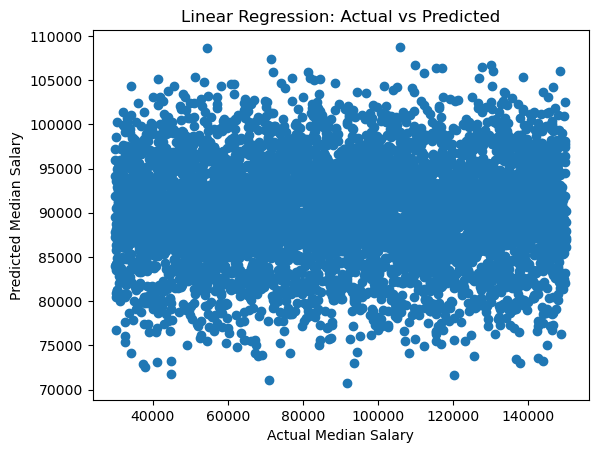

Ridge Regression RMSE: 34869.391104001894
Decision Tree Regression RMSE: 34500.41834269071


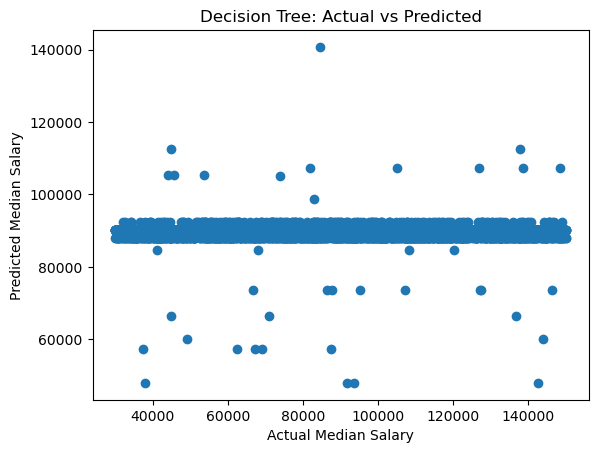


Model Comparison:
               Model          RMSE
0  Linear Regression  34894.024005
1   Ridge Regression  34869.391104
2      Decision Tree  34500.418343


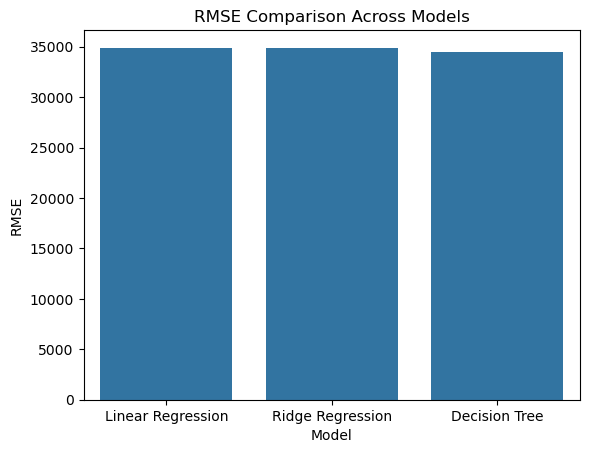

In [15]:

# Step 0: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset
df = pd.read_csv('ai_job_trends_dataset.csv')  # Replace with your CSV path

# Quick overview
print(df.head())
print(df.info())
print(df.describe())
print("\nMissing values per column:\n", df.isnull().sum())

# Step 2: Define Target and Features
target = 'Median Salary (USD)'  # Target variable
X = df.drop(target, axis=1)
y = df[target]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Experiment 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Linear Regression RMSE: {rmse_lr}')

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Median Salary')
plt.ylabel('Predicted Median Salary')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Experiment 2: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Ridge Regression RMSE: {rmse_ridge}')

# Experiment 3: Decision Tree Regression
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'Decision Tree Regression RMSE: {rmse_dt}')

# Plot Actual vs Predicted for Decision Tree
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Actual Median Salary')
plt.ylabel('Predicted Median Salary')
plt.title('Decision Tree: Actual vs Predicted')
plt.show()

# Step 4: Compare Models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Decision Tree'],
    'RMSE': [rmse_lr, rmse_ridge, rmse_dt]
})

print("\nModel Comparison:")
print(results)

# Optional: Bar plot
sns.barplot(x='Model', y='RMSE', data=results)
plt.title('RMSE Comparison Across Models')
plt.show()


In [10]:
import pandas as pd

df = pd.read_csv('ai_job_trends_dataset.csv')
print(df.columns)  # This will print all column names



Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')
